# CPC 251 Assignment 1: Linear Regression Model and Gradient Descent Algorithm

Group Number: Cardio_5

Group Members:

1.   Ching Jia Ying (153463)
2.   Chong Zhan Hang (151289)
3.   Ooi Chen Liang (150827)
4.   Tham Siew Teng (151396)

Lecturer: Dr. Mohd Halim bin Mohd Noor

This project aims to train the linear regression model by implementing gradient descent algorithm.

The dataset provided is split into training set and test set with a ratio of 8:2.

The linear regression model is finally evaluated using 2 popular performance metrics, which are R-squared and Mean Squared Error.

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [36]:
#This function trains the model with the given input features vector and the response vector
#alpha is the learning rate; max_epoch is the maximum epochs 
def train_model(X, y, alpha, max_epoch):
  
  #Get the number of samples and number of columns from the shape of input features vector
  samples, columns = X.shape
  
  #Initialise the bias(w0) and the weights
  w0 = 0
  w_init = np.zeros(columns)
  w = np.array(w_init)

  hist_loss = []

  #Update the value of weights and bias for every epoch 
  for i in range(max_epoch):
    yhat = prediction(w, w0, X) #predict the response using the previous weight and bias
    dw = (1 / samples) * np.dot(X.T, yhat - y)
    dw0 = (1 / samples) * np.sum(yhat - y)
    w = w - (alpha * dw) #update the weights for next epoch
    w0 = w0 - (alpha * dw0) #update the bias for next epoch
    
    #Calculate the squared loss for regression
    training_loss = loss_fn(y, yhat)

    #Append the loss for the epoch into an array called hist_loss
    hist_loss.append(training_loss)
    
  return w, w0, hist_loss

In [37]:
#This function predicts the response using the weights, bias, and the input features vector
def prediction (w, w0, X):
  yhat = np.dot(X, w) + w0
  return yhat

In [38]:
#This function calculates the mean squared error
def loss_fn(y, yhat):
  loss = np.square(y - yhat).mean()
  return loss

In [39]:
#This function calculates the R-squared score
def r2_score(y, yhat):
  SSE = np.sum(np.square(y - yhat))
  SST = np.sum(np.square(y - y.mean()))
  r2 = 1 - (SSE/SST)
  return r2

In [40]:
def main():
  #read the dataset csv file and put into df variable
  df = pd.read_csv('assignment1_dataset.csv', sep=',')

  #perform splitting of dataset into training set and test set
  from sklearn.model_selection import train_test_split

  #let the array [f1, f2, f3, f4, f5] be the x array, and the last column of df be the y value, 
  #and the test size being 0.2 of the whole dataset 
  f_train, f_test, y_train, y_test = train_test_split(df[['f1','f2', 'f3', 'f4', 'f5']], df.iloc[:,-1], test_size=0.2, random_state=1)
  
  #display the shape of the split dataset to show dataset has been split into 8:2
  print("The shape of f_train: " + str(f_train.shape))
  print("The shape of y_train: " + str(y_train.shape))
  print("The shape of f_test: " + str(f_test.shape))
  print("The shape of y_test: " + str(y_test.shape))
  print("\n\n")

  #Get the final weights and bias, and also the history of training loss by training the model
  w, w0, hist_loss = train_model(f_train, y_train, 0.35, 100)
  print("After training, the estimated weights w1, w2, w3, w4, w5 are", str(w), " with bias w0 of ", str(w0) + "\n\n")

  #Display the training loss value for each epoch in the loop from hist_loss
  print("The training loss for each epoch are:\n")
  for i in range(len(hist_loss)):
    print("Epoch " + str(i+1) + ": " + str(hist_loss[i]))

  #Plot the graph of training loss against epoch
  plt.plot(hist_loss)
  plt.xlabel("Epoch")
  plt.ylabel("Training Loss")
  plt.title("Training Loss Against Epoch")
  plt.show()
  
  #Make a prediction yhat using the test set
  yhat = prediction(w, w0, f_test)

  #Display the performance metrics, ie Mean Squared Error and R-squared score of the prediction model
  mean_squared_error = loss_fn(y_test, yhat)
  print("\n\nThe mean squared error of the prediction model is " + str(mean_squared_error))
  print("\n\nThe R-squared score of the prediction model is " + str(r2_score(y_test, yhat)) +"\n\n")

  #Plot the predicted data against the actual data
  plt.scatter(y_test, yhat)
  plt.xlabel('$Y_i$')
  plt.ylabel('$\hat{Y}_i$')
  plt.title('$Y_i$ vs $\hat{Y}_i$')
  #Plot the line oft prediction in red
  x = np.linspace(-100, 100, 100)
  y = x
  plt.plot(x, y, 'r')


The shape of f_train: (800, 5)
The shape of y_train: (800,)
The shape of f_test: (200, 5)
The shape of y_test: (200,)



After training, the estimated weights w1, w2, w3, w4, w5 are [ 1.16593501e+01 -9.32274111e-03  2.44917050e-01  3.69639916e+01
  1.46404941e-01]  with bias w0 of  9.628758358462148


The training loss for each epoch are:

Epoch 1: 1745.5521550944477
Epoch 2: 688.7091597138901
Epoch 3: 282.71893229695036
Epoch 4: 125.70347174571745
Epoch 5: 64.55414918019952
Epoch 6: 40.56963355220418
Epoch 7: 31.094357133773364
Epoch 8: 27.324120976949104
Epoch 9: 25.813282215084605
Epoch 10: 25.20365659971719
Epoch 11: 24.95603081278841
Epoch 12: 24.854806991580258
Epoch 13: 24.813180401526157
Epoch 14: 24.7959659284711
Epoch 15: 24.78880981390037
Epoch 16: 24.78582068286105
Epoch 17: 24.78456661139554
Epoch 18: 24.78403836018729
Epoch 19: 24.783815034249077
Epoch 20: 24.783720308497863
Epoch 21: 24.783680010058436
Epoch 22: 24.783662820191672
Epoch 23: 24.78365546988423
Epoch 24: 24

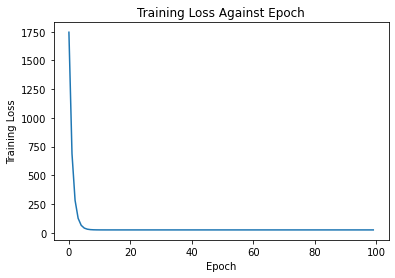



The mean squared error of the prediction model is 26.223414421712178


The R-squared score of the prediction model is 0.9829151932668235




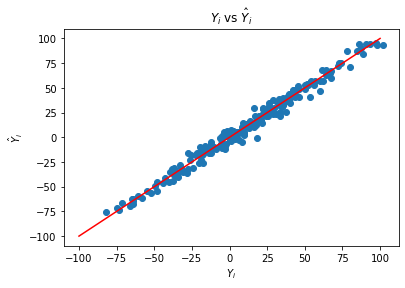

In [41]:
if __name__=="__main__":
  main()